First 5 rows of the dataset:
    Platform                               Post ID Post Type  \
0   LinkedIn  d49dadb4-fc1e-4775-88ad-d60b75cf5123     Video   
1  Instagram  16ce29c5-2dc7-478f-9814-a86754f3ce8b     Video   
2  Instagram  6a6cc741-72f4-4111-95a0-c5ee04a175a8     Video   
3    Twitter  0b5a3e70-c556-43cb-ad4f-a1d0003348bc     Image   
4   Facebook  a7d3e958-e2fe-411e-a24a-b96e821fc050      Link   

                                        Post Content  \
0                     Want that according same wish.   
1                       Increase fast partner south.   
2         Lawyer behavior born window couple sister.   
3                          Street great decade must.   
4  At clear meeting with reason ground continue c...   

               Post Timestamp  Likes  Comments  Shares  Impressions  Reach  \
0  2021-04-23 08:19:49.255108    415        77      85         2619   1842   
1  2023-07-30 06:40:06.356134    908       125      85         1223   3884   
2  2021-12-05 0

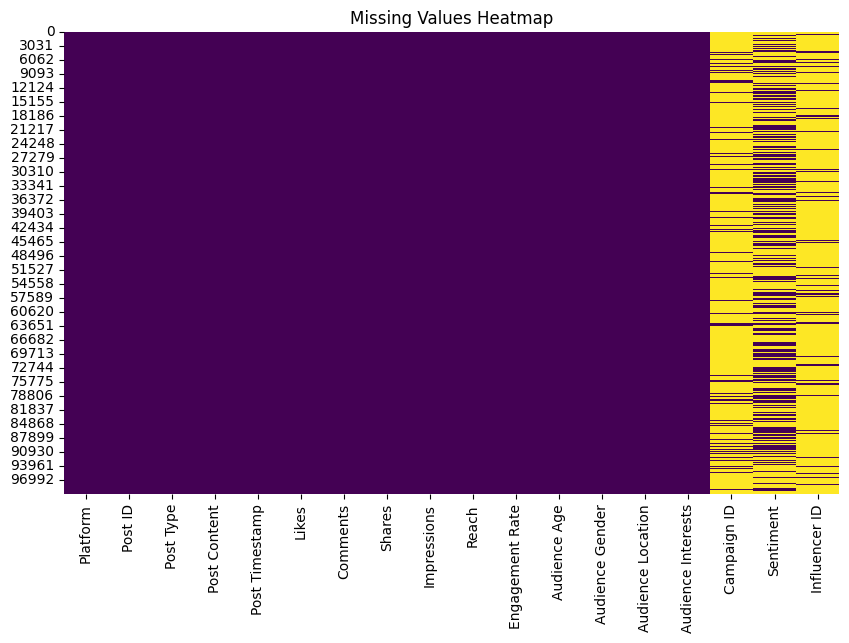


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 49900 entries, 0 to 99997
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Post ID                49900 non-null  object 
 1   Post Content           49900 non-null  object 
 2   Post Timestamp         49900 non-null  object 
 3   Likes                  49900 non-null  int64  
 4   Comments               49900 non-null  int64  
 5   Shares                 49900 non-null  int64  
 6   Impressions            49900 non-null  int64  
 7   Reach                  49900 non-null  int64  
 8   Engagement Rate        49900 non-null  float64
 9   Audience Age           49900 non-null  int64  
 10  Audience Location      49900 non-null  object 
 11  Audience Interests     49900 non-null  object 
 12  Sentiment              49900 non-null  object 
 13  Platform_Instagram     49900 non-null  bool   
 14  Platform_LinkedIn      49900 non-nul

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
file_path = r'C:\Users\tahsi\OneDrive\Desktop\Sentiment Analysis paper/social_media_engagement_data.csv'
data = pd.read_csv(file_path)

# Step 2: Basic Dataset Inspection
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Info:")
data.info()  # Provides column names, non-null counts, and data types

print("\nSummary of Numeric Columns:")
print(data.describe())  # Summary statistics for numeric columns

# Step 3: Check for Missing Values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

# Step 4: Check Unique Values for Categorical Columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns and Unique Values:")
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].unique())  # Display unique values in each categorical column

# Step 5: Initial Visualization of Missing Values (Optional)
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Step 6: Data Cleaning
# Define the target column and check its existence
target_column = "Sentiment"  # Confirm this is correct for your dataset
if target_column not in data.columns:
    raise KeyError(f"Error: The target column '{target_column}' was not found in the dataset.")

# Drop rows with missing values in the target column
data_cleaned = data.dropna(subset=[target_column])

# Drop columns with excessive missing values if they're not essential
data_cleaned = data_cleaned.drop(columns=['Campaign ID', 'Influencer ID'], errors='ignore')

# Impute missing values in numeric columns
numeric_cols = data_cleaned.select_dtypes(include=[np.number]).columns
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())

# Step 7: Encode Categorical Variables
# One-hot encode categorical variables for modeling compatibility
data_encoded = pd.get_dummies(data_cleaned, columns=['Platform', 'Post Type', 'Audience Gender'], drop_first=True)

# Step 8: Final Check on Cleaned Data
print("\nCleaned Dataset Info:")
data_encoded.info()

print("\nMissing Values in Each Column After Cleaning:")
print(data_encoded.isnull().sum())  # Ensure no missing values remain

print("\nSample of Cleaned Data:")
print(data_encoded.head())

# Step 9: Save the Cleaned and Processed Dataset
output_path = r'C:\Users\tahsi\OneDrive\Desktop\Sentiment Analysis paper/cleaned_social_media_engagement_data.csv'
data_encoded.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to: {output_path}")
